# AssistMent2017 数据集分析

# 数据集简介
该数据集来自2017年的ASSISTments平台，是一个匿名化的完整数据集。与2009和2012数据集相比，该数据集包含了更多的特征工程列和学生行为预测指标，包括学生的情绪状态预测、游戏行为检测等。

# 数据集列含义
ASSISTments2017数据集包含82个特征列，可以分为以下几类：

## 学生基本信息
- studentId：学生ID
- MiddleSchoolId：学校ID
- InferredGender：推断的性别（Male/Female）
- SY ASSISTments Usage：学年ASSISTments使用情况

## 学生整体表现指标
- AveKnow：平均知识水平
- AveCarelessness：平均粗心程度
- AveCorrect：平均正确率
- NumActions：操作次数
- AveResBored、AveResEngcon、AveResConf、AveResFrust、AveResOfftask、AveResGaming：各种情绪状态的平均残差值

## 问题相关信息
- problemId：问题ID
- problemType：问题类型
- skill：技能名称
- assignmentId：作业ID
- assistmentId：辅助问题ID

## 答题记录信息
- action_num：操作序号
- startTime：开始时间
- endTime：结束时间
- timeTaken：花费时间
- correct：是否正确（1=正确，0=错误）
- original：是否为主问题（1=主问题，0=支撑问题）
- attemptCount：尝试次数

## 提示和支撑信息
- hint：是否使用了提示
- hintCount：提示次数
- hintTotal：总提示数
- scaffold：是否使用了支撑
- bottomHint：是否使用了最底层提示

## 特征工程列
包含大量历史行为和统计特征，如：
- frIsHelpRequest、frPast5HelpRequest、frPast8HelpRequest：帮助请求相关
- stlHintUsed、past8BottomOut：提示使用相关
- totalFrPercentPastWrong、totalFrPastWrongCount等：历史错误统计
- frWorkingInSchool：是否在学校学习
- 各种时间和机会统计特征

## 情绪和行为预测
两套预测系统：
- confidence系列：BORED, CONCENTRATING, CONFUSED, FRUSTRATED, OFF TASK, GAMING
- RES系列：RES_BORED, RES_CONCENTRATING, RES_CONFUSED, RES_FRUSTRATED, RES_OFFTASK, RES_GAMING

## 学习结果信息
- Ln-1、Ln：学习相关指标
- MCAS：马萨诸塞州综合评估系统成绩
- Enrolled：是否注册
- Selective：是否选择性
- isSTEM：是否为STEM相关

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the ASSISTments 2017 dataset
data = pd.read_csv(
    "data/assistment17/anonymized_full_release_competition_dataset.csv",
    low_memory=False,
    encoding="latin1",
    )

In [2]:
# 显示数据集的前十行
data.head(10)

studentId  MiddleSchoolId InferredGender SY ASSISTments Usage   AveKnow  \
0          8               2           Male            2004-2005  0.352416   
1          8               2           Male            2004-2005  0.352416   
2          8               2           Male            2004-2005  0.352416   
3          8               2           Male            2004-2005  0.352416   
4          8               2           Male            2004-2005  0.352416   
5          8               2           Male            2004-2005  0.352416   
6          8               2           Male            2004-2005  0.352416   
7          8               2           Male            2004-2005  0.352416   
8          8               2           Male            2004-2005  0.352416   
9          8               2           Male            2004-2005  0.352416   

   AveCarelessness  AveCorrect  NumActions  AveResBored  AveResEngcon  ...  \
0         0.183276    0.483902        1056     0.208389      0.679126  ...   
1         0.183276    0.483902        1056     0.208389      0.679126  ...   
2         0.183276    0.483902        1056     0.208389      0.679126  ...   
3         0.183276    0.483902        1056     0.208389      0.679126  ...   
4         0.183276    0.483902        1056     0.208389      0.679126  ...   
5         0.183276    0.483902        1056     0.208389      0.679126  ...   
6         0.183276    0.483902        1056     0.208389      0.679126  ...   
7         0.183276    0.483902        1056     0.208389      0.679126  ...   
8         0.183276    0.483902        1056     0.208389      0.679126  ...   
9         0.183276    0.483902        1056     0.208389      0.679126  ...   

   RES_CONFUSED  RES_FRUSTRATED  RES_OFFTASK  RES_GAMING         Ln-1  \
0      0.000000             0.0     0.785585    0.000264         0.13   
1      0.887452             0.0     0.468252    0.001483  0.061190409   
2      0.887452             0.0     0.468252    0.001483        0.116   
3      0.000000             0.0     0.108417    0.010665        0.116   
4      0.000000             0.0     0.108417    0.010665  0.033305768   
5      0.000000             0.0     0.785585    0.002026  0.033305768   
6      0.000000             1.0     0.108417    0.005952  0.033305768   
7      0.060808             0.0     0.785585    0.010665        0.348   
8      0.060808             0.0     0.916914    0.012562        0.168   
9      0.060808             0.0     0.916914    0.012562        0.168   

            Ln  MCAS Enrolled  Selective  isSTEM  
0  0.061190409    45        0          0     NaN  
1  0.213509945    45        0          0     NaN  
2  0.033305768    45        0          0     NaN  
3  0.033305768    45        0          0     NaN  
4  0.118385889    45        0          0     NaN  
5  0.118385889    45        0          0     NaN  
6  0.118385889    45        0          0     NaN  
7  0.138588022    45        0          0     NaN  
8  0.097910759    45        0          0     NaN  
9  0.097910759    45        0          0     NaN  

[10 rows x 82 columns]

In [20]:
# 查看数据集的列名和基本信息
print("数据集的列名：")
print(data.columns)
print(f"总记录数：{len(data)}")

数据集的列名：
Index(['studentId', 'MiddleSchoolId', 'InferredGender', 'SY ASSISTments Usage',
       'AveKnow', 'AveCarelessness', 'AveCorrect', 'NumActions', 'AveResBored',
       'AveResEngcon', 'AveResConf', 'AveResFrust', 'AveResOfftask',
       'AveResGaming', 'action_num', 'skill', 'problemId', 'problemType',
       'assignmentId', 'assistmentId', 'startTime', 'endTime', 'timeTaken',
       'correct', 'original', 'hint', 'hintCount', 'hintTotal', 'scaffold',
       'bottomHint', 'attemptCount', 'frIsHelpRequest', 'frPast5HelpRequest',
       'frPast8HelpRequest', 'stlHintUsed', 'past8BottomOut',
       'totalFrPercentPastWrong', 'totalFrPastWrongCount', 'frPast5WrongCount',
       'frPast8WrongCount', 'totalFrTimeOnSkill', 'timeSinceSkill',
       'frWorkingInSchool', 'totalFrAttempted', 'totalFrSkillOpportunities',
       'responseIsFillIn', 'responseIsChosen', 'endsWithScaffolding',
       'endsWithAutoScaffolding', 'frTimeTakenOnScaffolding',
       'frTotalSkillOpportunitiesScaffol

In [4]:
# 显示数据集的基本统计信息
data.describe()

studentId  MiddleSchoolId        AveKnow  AveCarelessness  \
count  942816.000000   942816.000000  942816.000000    942816.000000   
mean     3844.844105        2.515472       0.195155         0.109436   
std      2250.484065        1.039785       0.116451         0.059952   
min         8.000000        1.000000       0.028057         0.007801   
25%      1952.000000        2.000000       0.110542         0.068760   
50%      3766.000000        2.000000       0.159285         0.094513   
75%      5781.000000        4.000000       0.247704         0.137316   
max      7783.000000        4.000000       0.752498         0.430576   

          AveCorrect     NumActions    AveResBored   AveResEngcon  \
count  942816.000000  942816.000000  942816.000000  942816.000000   
mean        0.372681     869.850594       0.232949       0.658442   
std         0.107367     530.210725       0.030637       0.027440   
min         0.000000       2.000000       0.170871       0.403309   
25%         0.294989     478.000000       0.209035       0.642060   
50%         0.345575     754.000000       0.230394       0.660669   
75%         0.428822    1151.000000       0.252082       0.676588   
max         0.932990    3057.000000       0.440870       0.723990   

          AveResConf    AveResFrust  ...      RES_BORED  RES_CONCENTRATING  \
count  942816.000000  942816.000000  ...  942816.000000       9.428160e+05   
mean        0.098940       0.131406  ...       0.232949       6.584415e-01   
std         0.034788       0.038875  ...       0.116371       1.734275e-01   
min         0.005075       0.000000  ...       0.156027       8.890000e-07   
25%         0.076385       0.107278  ...       0.156027       5.117519e-01   
50%         0.096357       0.127504  ...       0.156027       7.115475e-01   
75%         0.119282       0.150582  ...       0.376427       7.726099e-01   
max         0.402483       0.543463  ...       0.505313       1.000000e+00   

        RES_CONFUSED  RES_FRUSTRATED    RES_OFFTASK     RES_GAMING  \
count  942816.000000   942816.000000  942816.000000  942816.000000   
mean        0.098940        0.131406       0.172212       0.192703   
std         0.249505        0.300351       0.216997       0.340232   
min         0.000000        0.000000       0.000000       0.000001   
25%         0.000000        0.000000       0.048295       0.001483   
50%         0.000000        0.000000       0.122595       0.005797   
75%         0.000000        0.009561       0.122595       0.259648   
max         1.000000        1.000000       1.000000       0.999377   

                MCAS       Enrolled      Selective         isSTEM  
count  942816.000000  942816.000000  942816.000000  316974.000000  
mean      -95.982302       0.641147       0.300434       0.204178  
std       332.827628       0.479664       0.458447       0.403100  
min      -999.000000       0.000000       0.000000       0.000000  
25%        14.000000       0.000000       0.000000       0.000000  
50%        23.000000       1.000000       0.000000       0.000000  
75%        34.000000       1.000000       1.000000       0.000000  
max        54.000000       1.000000       1.000000       1.000000  

[8 rows x 76 columns]

# 数据缺失情况

In [5]:
# 统计原始数据中所有存在缺失值的列
missing_values = data.isnull().sum()
missing_cols = missing_values[missing_values > 0].sort_values(ascending=False)
print(f"存在缺失值的列数：{len(missing_cols)}")
print("\n缺失值统计（按缺失数量降序排列）：")
for col, count in missing_cols.items():
    percentage = (count / len(data)) * 100
    print(f"{col}: {count} ({percentage:.2f}%)")

存在缺失值的列数：3

缺失值统计（按缺失数量降序排列）：
isSTEM: 625842 (66.38%)
InferredGender: 173656 (18.42%)
sumTime3SDWhen3RowRight: 85 (0.01%)


# 数据集原始数据量
以下数据描述了原始数据集中包含的数据数量。

In [6]:
# 统计学生数量
num_students = data["studentId"].nunique()
print(f"学生数量: {num_students}")

# 统计问题数量
num_questions = data["problemId"].nunique()
print(f"总问题数量: {num_questions}")

# 统计技能数量
num_skills = data["skill"].nunique()
print(f"技能数量: {num_skills}")

# 主问题数量
num_main_questions = data[data["original"] == 1]["problemId"].nunique()
print(f"主问题数量: {num_main_questions}")

# 支撑问题数量
num_scaffolding_questions = data[data["original"] == 0]["problemId"].nunique()
print(f"支撑问题数量: {num_scaffolding_questions}")

# 总答题记录数
total_records = len(data)
print(f"总答题记录数: {total_records}")

# 学校数量
num_schools = data["MiddleSchoolId"].nunique()
print(f"学校数量: {num_schools}")

学生数量: 1709
总问题数量: 3162
技能数量: 102
主问题数量: 1183
支撑问题数量: 2651
总答题记录数: 942816
学校数量: 4


# 统计数据量
以下数据通过一些统计量来描述数据集的结构。

In [7]:
# 平均每个学生的答题次数
attempts_per_student = data.groupby("studentId")["problemId"].count()
avg_attempts_per_student = attempts_per_student.mean()
median_attempts_per_student = attempts_per_student.median()
print(f"平均每个学生的答题次数: {avg_attempts_per_student:.2f}")
print(f"中位数每个学生的答题次数: {median_attempts_per_student:.2f}")

# 每个问题关联的技能数量（检查是否一个问题对应一个技能）
skills_per_question = data.groupby("problemId")["skill"].nunique()
print("\n每个问题关联的技能数量统计:")
print(skills_per_question.describe())
avg_skills_per_question = skills_per_question.mean()
median_skills_per_question = skills_per_question.median()
print(f"\n平均每个问题关联的技能数量: {avg_skills_per_question:.2f}")
print(f"中位数每个问题关联的技能数量: {median_skills_per_question:.2f}")

# 每个技能关联的问题数量
questions_per_skill = data.groupby("skill")["problemId"].nunique()
print("\n每个技能关联的问题数量统计:")
print(questions_per_skill.describe())
avg_questions_per_skill = questions_per_skill.mean()
median_questions_per_skill = questions_per_skill.median()
print(f"\n平均每个技能关联的问题数量: {avg_questions_per_skill:.2f}")
print(f"中位数每个技能关联的问题数量: {median_questions_per_skill:.2f}")

平均每个学生的答题次数: 551.68
中位数每个学生的答题次数: 441.00

每个问题关联的技能数量统计:
count    3162.000000
mean        1.225174
std         0.428971
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: skill, dtype: float64

平均每个问题关联的技能数量: 1.23
中位数每个问题关联的技能数量: 1.00

每个技能关联的问题数量统计:
count     102.000000
mean       37.980392
std       108.896261
min         1.000000
25%         4.000000
50%        18.000000
75%        44.750000
max      1071.000000
Name: problemId, dtype: float64

平均每个技能关联的问题数量: 37.98
中位数每个技能关联的问题数量: 18.00


# 其他列的分析

- 主问题和支撑问题
- 问题类型
- 性别分布
- 提示和支撑使用情况
- 情绪和行为预测

### 主问题和支撑问题 (original)
- 主问题：1
- 支撑问题：0

In [8]:
# 主问题和支撑问题的答题记录分布
original_counts = data["original"].value_counts()
print("主问题和支撑问题的答题记录分布:")
print(f"主问题 (original=1): {original_counts.get(1, 0)} 条记录 ({original_counts.get(1, 0)/len(data)*100:.2f}%)")
print(f"支撑问题 (original=0): {original_counts.get(0, 0)} 条记录 ({original_counts.get(0, 0)/len(data)*100:.2f}%)")

# 主问题和支撑问题的唯一问题数量
main_questions = data[data["original"] == 1]["problemId"].unique()
print(f"\n主问题唯一数量: {len(main_questions)}")
scaffolding_questions = data[data["original"] == 0]["problemId"].unique()
print(f"支撑问题唯一数量: {len(scaffolding_questions)}")

主问题和支撑问题的答题记录分布:
主问题 (original=1): 249105 条记录 (26.42%)
支撑问题 (original=0): 693711 条记录 (73.58%)

主问题唯一数量: 1183
支撑问题唯一数量: 2651


### 问题类型 (problemType)
统计不同问题类型的分布。

In [9]:
# 问题类型分布
problem_types = data["problemType"].value_counts()
print("问题类型分布（按答题记录数）:")
for ptype, count in problem_types.items():
    percentage = (count / len(data)) * 100
    print(f"{ptype}: {count} 条记录 ({percentage:.2f}%)")

# 每种类型的唯一问题数量
print("\n每种类型的唯一问题数量:")
for ptype in problem_types.index:
    unique_count = data[data["problemType"] == ptype]["problemId"].nunique()
    print(f"{ptype}: {unique_count} 个问题")

问题类型分布（按答题记录数）:
textfieldquestion: 264399 条记录 (28.04%)
radioquestion: 196207 条记录 (20.81%)
noprobtype: 187501 条记录 (19.89%)
1: 116765 条记录 (12.38%)
algebrafieldquestion: 75612 条记录 (8.02%)
other: 41767 条记录 (4.43%)
algebra: 21808 条记录 (2.31%)
popupmenuquestion: 13816 条记录 (1.47%)
interfaceradioquestion1: 11392 条记录 (1.21%)
checkboxquestion: 4120 条记录 (0.44%)
interfacetextfieldquestion1: 3244 条记录 (0.34%)
algebrafieldquestion1: 2854 条记录 (0.30%)
interfaceradioquestion: 1531 条记录 (0.16%)
interfacetextfieldquestion: 1242 条记录 (0.13%)
interfacepopupmenuquestion1: 486 条记录 (0.05%)
0: 72 条记录 (0.01%)

每种类型的唯一问题数量:
textfieldquestion: 678 个问题
radioquestion: 865 个问题
noprobtype: 1265 个问题
1: 489 个问题
algebrafieldquestion: 334 个问题
other: 458 个问题
algebra: 340 个问题
popupmenuquestion: 70 个问题
interfaceradioquestion1: 54 个问题
checkboxquestion: 5 个问题
interfacetextfieldquestion1: 14 个问题
algebrafieldquestion1: 12 个问题
interfaceradioquestion: 9 个问题
interfacetextfieldquestion: 6 个问题
interfacepopupmenuquestion1: 3 个问题
0: 28 个问

### 性别分布 (InferredGender)

In [10]:
# 性别分布
gender_counts = data["InferredGender"].value_counts()
print("性别分布（答题记录）:")
for gender, count in gender_counts.items():
    percentage = (count / len(data)) * 100
    print(f"{gender}: {count} 条记录 ({percentage:.2f}%)")

# 统计有性别信息的学生数量
students_with_gender = data[data["InferredGender"].notna()]["studentId"].nunique()
print(f"\n有性别信息的学生数量: {students_with_gender}")
print(f"缺失性别信息的记录数: {data['InferredGender'].isna().sum()} ({data['InferredGender'].isna().sum()/len(data)*100:.2f}%)")

性别分布（答题记录）:
Male: 407637 条记录 (43.24%)
Female: 361523 条记录 (38.35%)

有性别信息的学生数量: 1378
缺失性别信息的记录数: 173656 (18.42%)


### 提示和支撑使用情况

In [11]:
# 提示使用情况
hint_usage = data["hint"].value_counts()
print("提示使用情况:")
for hint_val, count in hint_usage.items():
    percentage = (count / len(data)) * 100
    print(f"hint={hint_val}: {count} 条记录 ({percentage:.2f}%)")

# 支撑使用情况
scaffold_usage = data["scaffold"].value_counts()
print("\n支撑使用情况:")
for scaffold_val, count in scaffold_usage.items():
    percentage = (count / len(data)) * 100
    print(f"scaffold={scaffold_val}: {count} 条记录 ({percentage:.2f}%)")

# 最底层提示使用情况
bottom_hint_usage = data["bottomHint"].value_counts()
print("\n最底层提示使用情况:")
for bh_val, count in bottom_hint_usage.items():
    percentage = (count / len(data)) * 100
    print(f"bottomHint={bh_val}: {count} 条记录 ({percentage:.2f}%)")

# 提示次数统计
print("\n提示次数统计:")
print(f"平均提示次数: {data['hintCount'].mean():.2f}")
print(f"中位数提示次数: {data['hintCount'].median():.2f}")
print(f"最大提示次数: {data['hintCount'].max()}")

提示使用情况:
hint=0: 630720 条记录 (66.90%)
hint=1: 312096 条记录 (33.10%)

支撑使用情况:
scaffold=0: 579142 条记录 (61.43%)
scaffold=1: 363674 条记录 (38.57%)

最底层提示使用情况:
bottomHint=0: 883613 条记录 (93.72%)
bottomHint=1: 59203 条记录 (6.28%)

提示次数统计:
平均提示次数: 1.22
中位数提示次数: 0.00
最大提示次数: 56


### 情绪和行为预测
数据集包含两类情绪预测：
1. **confidence系列**：BORED, CONCENTRATING, CONFUSED, FRUSTRATED, OFF TASK, GAMING
2. **RES系列**：RES_BORED, RES_CONCENTRATING, RES_CONFUSED, RES_FRUSTRATED, RES_OFFTASK, RES_GAMING

In [12]:
# confidence系列情绪预测统计
confidence_columns = ['confidence(BORED)', 'confidence(CONCENTRATING)', 'confidence(CONFUSED)', 
                      'confidence(FRUSTRATED)', 'confidence(OFF TASK)', 'confidence(GAMING)']

print("Confidence系列情绪预测统计:")
for col in confidence_columns:
    if col in data.columns:
        print(f"\n{col}:")
        print(f"  均值: {data[col].mean():.4f}")
        print(f"  标准差: {data[col].std():.4f}")
        print(f"  最小值: {data[col].min():.4f}")
        print(f"  最大值: {data[col].max():.4f}")

# RES系列情绪预测统计
res_columns = ['RES_BORED', 'RES_CONCENTRATING', 'RES_CONFUSED', 
               'RES_FRUSTRATED', 'RES_OFFTASK', 'RES_GAMING']

print("\n\nRES系列情绪预测统计:")
for col in res_columns:
    if col in data.columns:
        print(f"\n{col}:")
        print(f"  均值: {data[col].mean():.4f}")
        print(f"  标准差: {data[col].std():.4f}")
        print(f"  最小值: {data[col].min():.4f}")
        print(f"  最大值: {data[col].max():.4f}")

Confidence系列情绪预测统计:

confidence(BORED):
  均值: 0.4370
  标准差: 0.1208
  最小值: 0.3557
  最大值: 0.6810

confidence(CONCENTRATING):
  均值: 0.5401
  标准差: 0.1830
  最小值: 0.0000
  最大值: 1.0000

confidence(CONFUSED):
  均值: 0.1344
  标准差: 0.2929
  最小值: 0.0000
  最大值: 1.0000

confidence(FRUSTRATED):
  均值: 0.1641
  标准差: 0.3261
  最小值: 0.0000
  最大值: 1.0000

confidence(OFF TASK):
  均值: 0.2560
  标准差: 0.2132
  最小值: 0.0000
  最大值: 1.0000

confidence(GAMING):
  均值: 0.3379
  标准差: 0.3353
  最小值: 0.0000
  最大值: 0.9997


RES系列情绪预测统计:

RES_BORED:
  均值: 0.2329
  标准差: 0.1164
  最小值: 0.1560
  最大值: 0.5053

RES_CONCENTRATING:
  均值: 0.6584
  标准差: 0.1734
  最小值: 0.0000
  最大值: 1.0000

RES_CONFUSED:
  均值: 0.0989
  标准差: 0.2495
  最小值: 0.0000
  最大值: 1.0000

RES_FRUSTRATED:
  均值: 0.1314
  标准差: 0.3004
  最小值: 0.0000
  最大值: 1.0000

RES_OFFTASK:
  均值: 0.1722
  标准差: 0.2170
  最小值: 0.0000
  最大值: 1.0000

RES_GAMING:
  均值: 0.1927
  标准差: 0.3402
  最小值: 0.0000
  最大值: 0.9994


# 数据结构可视化
这一板块中包含了对数据集中重要数据的可视化代码和结果。

- 学生的答题次数分布图
- 问题类型分布图
- 整体答题正确率分布图
- 主问题vs支撑问题分布
- 情绪状态分布图
- 性别分布图

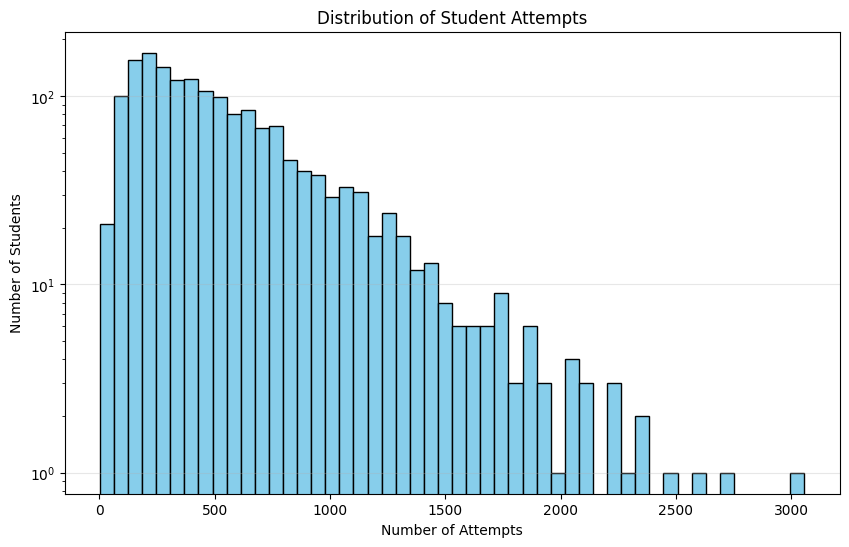

In [13]:
# 每个学生的答题次数
student_attempts = data.groupby("studentId")["problemId"].count()

# 绘制学生答题次数的分布图
plt.figure(figsize=(10, 6))
plt.hist(student_attempts, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Student Attempts')
plt.xlabel('Number of Attempts')
plt.ylabel('Number of Students')
plt.yscale('log')
plt.grid(axis='y', alpha=0.3)
plt.show()

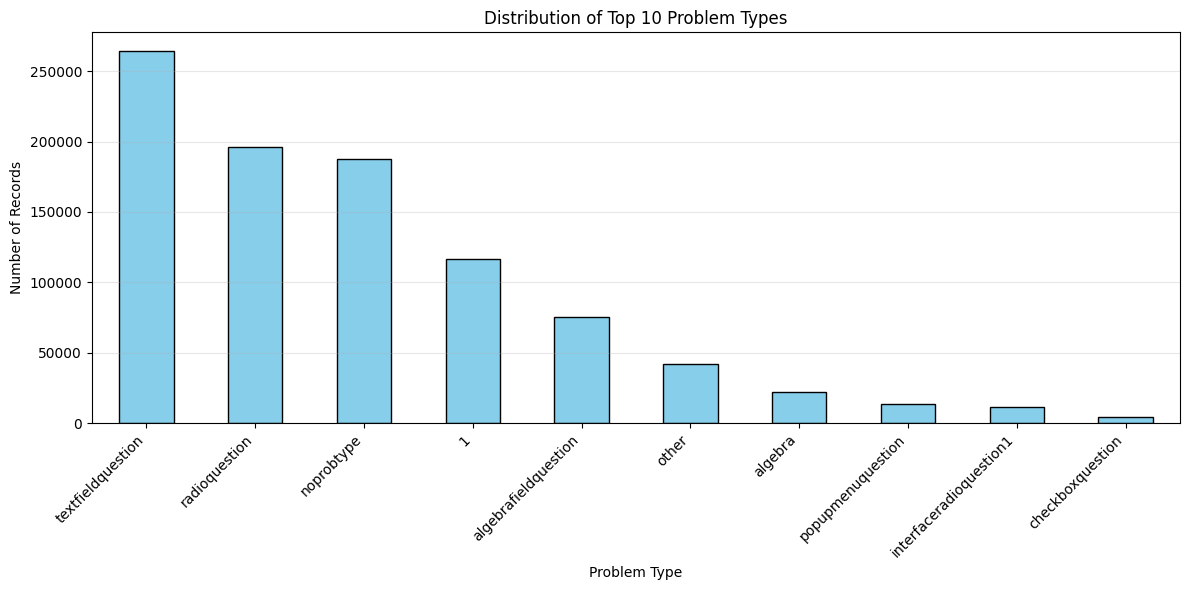

In [14]:
# 问题类型分布（只显示前10个最常见的类型）
problem_type_counts = data["problemType"].value_counts().head(10)

# 绘制问题类型数量的分布图
plt.figure(figsize=(12, 6))
problem_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Top 10 Problem Types')
plt.xlabel('Problem Type')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

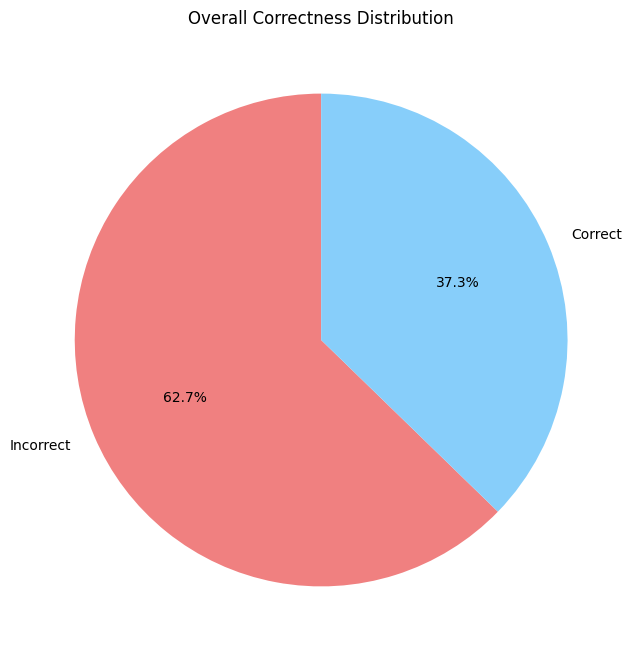

正确答题记录数: 351370
错误答题记录数: 591446


In [15]:
# 答题正确率
correct_data = data["correct"].value_counts()

# 绘制答题正确率的饼图
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightskyblue']
labels = ['Incorrect', 'Correct']
plt.pie(correct_data, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Overall Correctness Distribution')
plt.show()

print(f"正确答题记录数: {correct_data.get(1, 0)}")
print(f"错误答题记录数: {correct_data.get(0, 0)}")

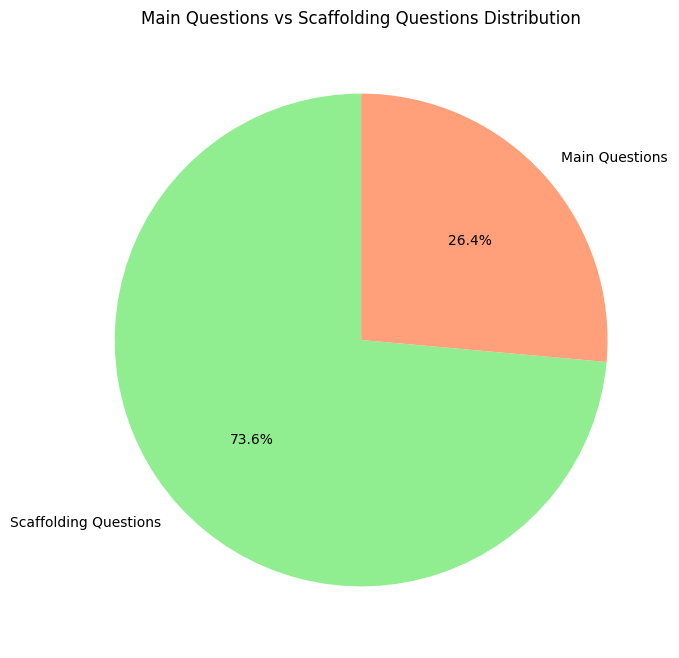

In [16]:
# 主问题vs支撑问题分布
original_counts = data["original"].value_counts()

plt.figure(figsize=(8, 8))
colors = ['lightgreen', 'lightsalmon']
labels = ['Scaffolding Questions', 'Main Questions']
sizes = [original_counts.get(0, 0), original_counts.get(1, 0)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Main Questions vs Scaffolding Questions Distribution')
plt.show()

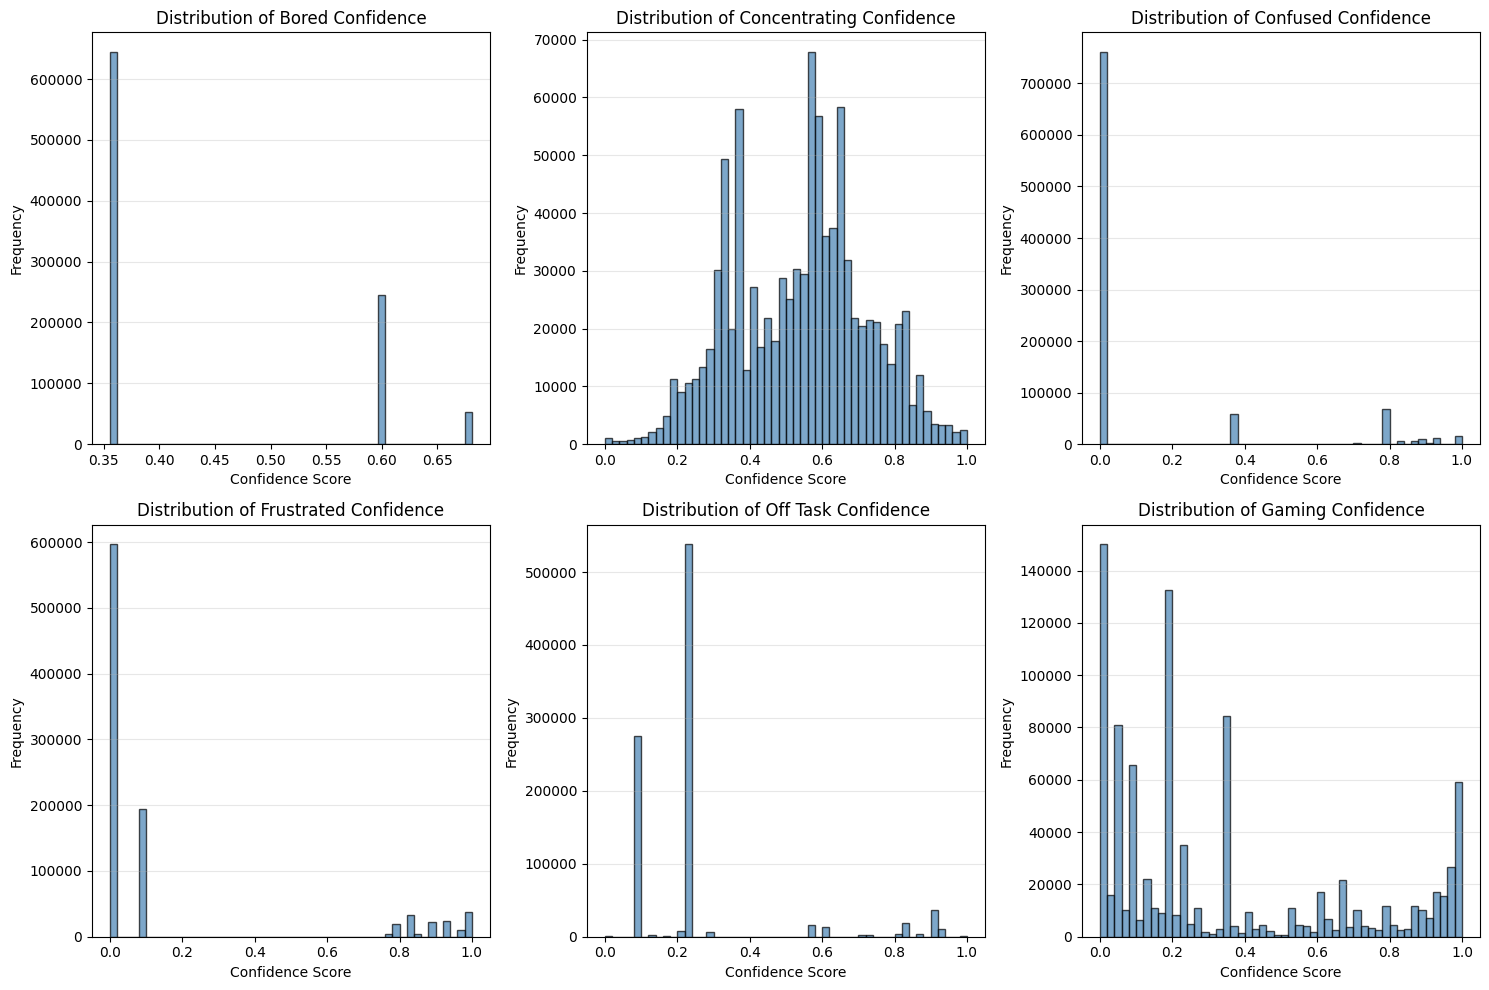

In [17]:
# 情绪状态分布图（confidence系列）
confidence_columns = ['confidence(BORED)', 'confidence(CONCENTRATING)', 'confidence(CONFUSED)', 
                      'confidence(FRUSTRATED)', 'confidence(OFF TASK)', 'confidence(GAMING)']
confidence_labels = ['Bored', 'Concentrating', 'Confused', 'Frustrated', 'Off Task', 'Gaming']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (col, label) in enumerate(zip(confidence_columns, confidence_labels)):
    if col in data.columns:
        axes[i].hist(data[col].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribution of {label} Confidence')
        axes[i].set_xlabel('Confidence Score')
        axes[i].set_ylabel('Frequency')
        axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

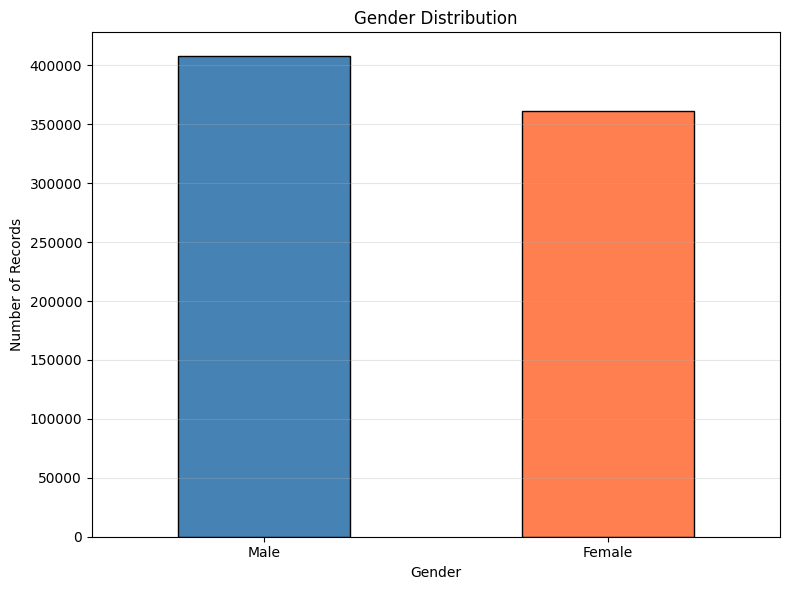

In [18]:
# 性别分布图
gender_counts = data["InferredGender"].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['steelblue', 'coral'], edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Records')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 数据集总结

## 数据规模
- **学生数量**：1,709名学生
- **问题数量**：3,162个问题（主问题1,183个，支撑问题2,651个）
- **技能数量**：102个技能
- **总记录数**：942,816条答题记录
- **学校数量**：4所学校

## 数据特点
1. **答题活跃度高**：平均每个学生有551.68次答题记录，中位数为441次，远高于2009和2012数据集
2. **支撑问题占比高**：73.6%的记录是支撑问题，说明学生在解题过程中需要大量辅助
3. **整体正确率较低**：只有37.3%的答题记录是正确的，错误率达到62.7%
4. **问题-技能关系**：平均每个问题关联1.23个技能，大部分问题只对应一个技能
5. **技能-问题关系**：平均每个技能关联37.98个问题，但分布不均（中位数仅18个）

## 问题类型分布
最常见的问题类型为：
1. textfieldquestion（文本框问题）：28.04%
2. radioquestion（单选题）：20.81%
3. noprobtype（无类型）：19.89%

## 学生使用行为
1. **提示使用**：33.10%的记录使用了提示，平均提示次数1.22次
2. **支撑使用**：38.57%的记录使用了支撑结构
3. **最底层提示**：仅6.28%的记录使用了最底层提示

## 性别分布
- 男性学生记录：43.24%
- 女性学生记录：38.35%
- 缺失性别信息：18.42%

## 情绪状态特征
- **Concentrating（专注）**：平均置信度最高（0.54），说明学生大部分时间处于专注状态
- **Bored（无聊）**：平均置信度0.44
- **Gaming（游戏行为）**：平均置信度0.34
- **Off Task（离线任务）**：平均置信度0.26
- **Frustrated（挫败）**：平均置信度0.16
- **Confused（困惑）**：平均置信度0.13

## 与其他数据集的比较

| 特征 | ASSISTment09 | ASSISTment12 | ASSISTment17 |
|------|--------------|--------------|--------------|
| 学生数量 | 4,217 | 29,018 | 1,709 |
| 问题数量 | 26,688 | 50,993 | 3,162 |
| 技能数量 | 123 | 265 | 102 |
| 总记录数 | 401,756 | 2,506,853 | 942,816 |
| 平均每学生答题数 | 95.27 | 86.36 | 551.68 |
| 特征列数 | 28 | 47 | 82 |
| 情绪预测 | 无 | 有（4种） | 有（6种×2套） |